In [1]:
import konlpy

In [2]:
!pip install xmltodict

In [3]:
!pip install beautifulsoup4

In [4]:
url = 'http://apis.data.go.kr/1170000/law/lawSearchList.do?\
serviceKey=22Nn4Pf%2BappHSmLc8TsnR7KrSDh2oLZY%2BKUO%2Fk%2BAzsebJsWWxNqAafz3Y4c1t7SVy6SUTa2qvXNdbIwBzIvhrQ%3D%3D&\
target=law&query=*&numOfRows=10000&pageNo=1'

import requests
from bs4 import BeautifulSoup as bs
import xmltodict #xml -> html과 비슷한 태그 언어 

In [5]:
req = requests.get(url).content
xmlObject = xmltodict.parse(req) #xml > 딕셔너리 바꾸고 req를 파싱
xmlObject['LawSearch']['law']

[{'@id': '1',
  '법령일련번호': '232157',
  '현행연혁코드': '현행',
  '법령명한글': '10ㆍ27법난 피해자의 명예회복 등에 관한 법률',
  '법령약칭명': '10ㆍ27법난법',
  '법령ID': '010719',
  '공포일자': '20210518',
  '공포번호': '18146',
  '제개정구분명': '일부개정',
  '소관부처코드': '1371000',
  '소관부처명': '문화체육관광부',
  '법령구분명': '법률',
  '시행일자': '20210518',
  '자법타법여부': None,
  '법령상세링크': '/DRF/lawService.do?OC=sapphire_5&target=law&MST=232157&type=HTML&mobileYn=&efYd=20210518'},
 {'@id': '2',
  '법령일련번호': '235703',
  '현행연혁코드': '현행',
  '법령명한글': '10ㆍ27법난 피해자의 명예회복 등에 관한 법률 시행령',
  '법령약칭명': '10ㆍ27법난법시행령',
  '법령ID': '010831',
  '공포일자': '20210929',
  '공포번호': '32018',
  '제개정구분명': '타법개정',
  '소관부처코드': '1371000',
  '소관부처명': '문화체육관광부',
  '법령구분명': '대통령령',
  '시행일자': '20210929',
  '자법타법여부': None,
  '법령상세링크': '/DRF/lawService.do?OC=sapphire_5&target=law&MST=235703&type=HTML&mobileYn=&efYd=20210929'},
 {'@id': '3',
  '법령일련번호': '236231',
  '현행연혁코드': '현행',
  '법령명한글': '119구조ㆍ구급에 관한 법률',
  '법령약칭명': '119법',
  '법령ID': '011349',
  '공포일자': '20211019',
  '공포번호': '18487',
  '제개정구분명': '일부

In [6]:
import pandas as pd
import numpy as np

df = pd.DataFrame(xmlObject['LawSearch']['law'])
df.head()

,@id,법령일련번호,현행연혁코드,법령명한글,법령약칭명,법령ID,공포일자,공포번호,제개정구분명,소관부처코드,소관부처명,법령구분명,시행일자,자법타법여부,법령상세링크
0,1,232157,현행,10ㆍ27법난 피해자의 명예회복 등에 관한 법률,10ㆍ27법난법,010719,20210518,18146,일부개정,1371000,문화체육관광부,법률,20210518,None,/DRF/lawService.do?OC=sapphire_5&target=law&MS...
1,2,235703,현행,10ㆍ27법난 피해자의 명예회복 등에 관한 법률 시행령,10ㆍ27법난법시행령,010831,20210929,32018,타법개정,1371000,문화체육관광부,대통령령,20210929,None,/DRF/lawService.do?OC=sapphire_5&target=law&MS...
2,3,236231,현행,119구조ㆍ구급에 관한 법률,119법,011349,20211019,18487,일부개정,1661000,소방청,법률,20220120,None,/DRF/lawService.do?OC=sapphire_5&target=law&MS...
3,4,236155,현행,119구조ㆍ구급에 관한 법률 시행령,119법시행령,011452,20211019,32070,일부개정,1661000,소방청,대통령령,20220106,None,/DRF/lawService.do?OC=sapphire_5&target=law&MS...
4,5,243963,현행,119구조ㆍ구급에 관한 법률 시행규칙,119법시행규칙,011457,20220721,00345,일부개정,1661000,소방청,행정안전부령,20220721,None,/DRF/lawService.do?OC=sapphire_5&target=law&MS...


In [7]:
#법령명 한글만 떼와서 얘네 키워드로 워드크라우드 할거라고 하심 

target = df['법령명한글'].values #배열
title_list = target.tolist() #리스트로 변환
text = ' '.join(title_list) #공백하나를 기준으로 각 요소들을 하나의 텍스트로 합치기
text

'10ㆍ27법난 피해자의 명예회복 등에 관한 법률 10ㆍ27법난 피해자의 명예회복 등에 관한 법률 시행령 119구조ㆍ구급에 관한 법률 119구조ㆍ구급에 관한 법률 시행령 119구조ㆍ구급에 관한 법률 시행규칙 1945년이후종전의규정에의한학교졸업자자격인정령 1959년 12월 31일 이전에 퇴직한 군인의 퇴직급여금지급에 관한 특별법 1959년 12월 31일 이전에 퇴직한 군인의 퇴직급여금지급에 관한 특별법 시행령 1980년해직공무원의보상등에관한특별조치법 1980년해직공무원의보상등에관한특별조치법시행령 1인 창조기업 육성에 관한 법률 1인 창조기업 육성에 관한 법률 시행령 2018 평창 동계올림픽대회 및 동계패럴림픽대회 지원 등에 관한 특별법 2018 평창 동계올림픽대회 및 동계패럴림픽대회 지원 등에 관한 특별법 시행령 2023 새만금 세계스카우트잼버리 지원 특별법 2023 새만금 세계스카우트잼버리 지원 특별법 시행령 2023 순천만국제정원박람회 지원 및 사후활용에 관한 특별법 2023 순천만국제정원박람회 지원 및 사후활용에 관한 특별법 시행령 2030 부산세계박람회 유치위원회의 설치 및 운영에 관한 규정 30개월 이상 복무한 상등병 만기전역자의 특별진급을 위한 특별법 30개월 이상 복무한 상등병 만기전역자의 특별진급을 위한 특별법 시행령 3ㆍ15의거 참여자의 명예회복 등에 관한 법률 3ㆍ15의거 참여자의 명예회복 등에 관한 법률 시행령 4ㆍ16세월호참사 진상규명 및 안전사회 건설 등을 위한 특별법 4ㆍ16세월호참사 진상규명 및 안전사회 건설 등을 위한 특별법 시행령 4ㆍ16세월호참사 피해구제 및 지원 등을 위한 특별법 4ㆍ16세월호참사 피해구제 및 지원 등을 위한 특별법 시행령 4차산업혁명위원회의 설치 및 운영에 관한 규정 5ㆍ18민주유공자예우 및 단체설립에 관한 법률 5ㆍ18민주유공자예우 및 단체설립에 관한 법률 시행령 5ㆍ18민주유공자예우 및 단체설립에 관한 법률 시행규칙 5ㆍ18민주화운동 관련자 보상 등에 관한 법률 5ㆍ18민주화운동 관련자 보상 등에 관한 법률

In [8]:
#전처리해서 워드클라우드로 만들거임 
# 한글 아닌거는 공백으로 처리 
import re 

text = re.sub('[^가-힣]+', ' ', text)
print(len(text))
text[:100]#얘는 그냥 확인하려고 

96196


' 법난 피해자의 명예회복 등에 관한 법률 법난 피해자의 명예회복 등에 관한 법률 시행령 구조 구급에 관한 법률 구조 구급에 관한 법률 시행령 구조 구급에 관한 법률 시행규칙 년이후'

#### 참고 자료
- https://konlpy.org/ko/v0.4.3/api/konlpy.tag/
- https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0
- https://mr-doosun.tistory.com/22

In [9]:
#형태소 분석을 해주는 패키지 konlpy
#Okt(Open Korean Text)는 트위터에서 만든 오픈소스 한국어 처리기

from konlpy.tag import Okt 

okt = Okt()
morph = okt.pos(text) #pos > 텍스트에서 단어와 품사를 뽑아줌 
noun_list = []

for word, tag in morph: #tag = Noun은 명사라는 것
    if (tag == 'Noun') & (len(word) > 1): #하나인거는 거의 조사여서 의미없으니까 2개이상부터
        noun_list.append(word)
#     print(morph)
print(noun_list)

['법난', '피해자', '명예', '회복', '법률', '법난', '피해자', '명예', '회복', '법률', '시행', '구조', '구급', '법률', '구조', '구급', '법률', '시행', '구조', '구급', '법률', '시행', '규칙', '이후', '종전', '규정', '학교', '졸업', '자격', '정령', '이전', '퇴직', '군인', '퇴직', '금지', '특별법', '이전', '퇴직', '군인', '퇴직', '금지', '특별법', '시행', '해직', '공무원', '보상', '특별', '조치', '해직', '공무원', '보상', '특별', '조치', '시행', '창조', '기업', '육성', '법률', '창조', '기업', '육성', '법률', '시행', '평창', '동계올림픽', '대회', '동계', '패럴림픽', '대회', '지원', '특별법', '평창', '동계올림픽', '대회', '동계', '패럴림픽', '대회', '지원', '특별법', '시행', '새만금', '세계', '스카우트', '잼버리', '지원', '특별법', '새만금', '세계', '스카우트', '잼버리', '지원', '특별법', '시행', '순천만', '국제', '정원', '박람회', '지원', '사후', '활용', '특별법', '순천만', '국제', '정원', '박람회', '지원', '사후', '활용', '특별법', '시행', '부산', '세계박람회', '유치', '위원회', '설치', '운영', '규정', '개월', '이상', '복무', '상등병', '전역', '특별', '진급', '특별법', '개월', '이상', '복무', '상등병', '전역', '특별', '진급', '특별법', '시행', '의거', '참여자', '명예', '회복', '법률', '의거', '참여자', '명예', '회복', '법률', '시행', '세월호', '참사', '진상', '규명', '안전', '사회', '건설', '특별법', '세월호', '참사', '진상', '규명', '안전', '사회'

In [10]:
#그냥한번 해본거 
from collections import Counter #글자 카운트해주는 함수 
one_word = []
for word, tag in morph:
    if (tag == 'Noun') & (len(word)==1):
        one_word.append(word)

#most_common() > 데이터의 개수가 많은 순으로 정렬된 배열을 리턴하는 메서드
#인자로 숫자 n을 넘기면 그 숫자 만큼만 리턴하기 때문에, 가장 개수가 많은 n개의 데이터를 얻을 수도 있습니다.
#(글자, 나온 횟수)를 요소로 가진 리스트를 반환함


one_dict = dict(Counter(one_word).most_common())

#Key, Value 쌍 얻기(items)
# https://infinitt.tistory.com/122 -> sorted 참고
keys = sorted(one_dict.items(), key=lambda x:x[1], reverse=True)
keys[:10]


[('관', 2399),
 ('령', 1496),
 ('법', 1450),
 ('및', 1258),
 ('등', 743),
 ('위', 146),
 ('그', 100),
 ('군', 37),
 ('제', 37),
 ('업', 36)]

In [11]:
#여기부터가 중요
from collections import Counter 
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font', family = 'Malgun Gothic') #한글 폰트 설정
plt.rcParams['axes.unicode_minus'] #마이너스 부호 출력 설정

count = Counter(noun_list) #두글자 이상이면서 명사인걸 count에 담음 
data = dict(count.most_common()) #많이 나오는걸 dict로 해서 data에 넣었고 
series = pd.Series(data)

df = pd.DataFrame(series, columns=['cnt']) #cnt 가 의미하는건 count , #글자 부분은 인덱스라 칼럼명을 하나만 준것
df10 = df.sort_values(by='cnt', ascending=False)[:10]
df10.reset_index(inplace = True)
df10

,index,cnt
0,시행,2445
1,규칙,1755
2,법률,1481
3,관리,535
4,지원,364
5,규정,327
6,특별법,318
7,진흥,284
8,산업,276
9,운영,247


<AxesSubplot:xlabel='index', ylabel='cnt'>

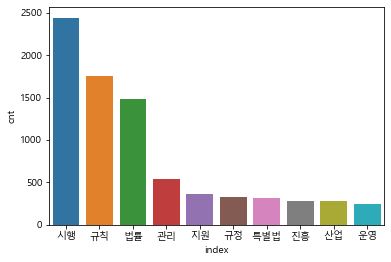

In [12]:
sns.barplot(x='index',y='cnt',data=df10, orient='v')

In [13]:
!pip install wordcloud

#### 워드클라우드 커스터마이징 cf)
https://wannabe00.tistory.com/entry/Word-cloud-%EC%9B%90%ED%95%98%EB%8A%94-%EC%83%89%EC%9C%BC%EB%A1%9C-%EA%BE%B8%EB%AF%B8%EA%B8%B0-word-cloud-customize-color

(-0.5, 1499.5, 999.5, -0.5)

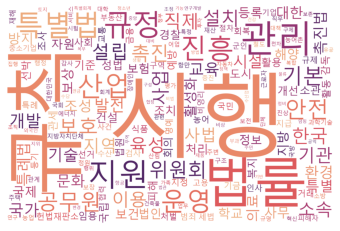

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt #생성한 워드클라우드 데이터를 시각화하여 그리기 위해 
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white', colormap='flare', width=1500, height=1000).generate_from_frequencies(data) 
# generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기
# font_path는 ..(상위올라가는거, 비쥬얼라이제이션 폴더에 멜건 가져오는거) , 얘는 무튼 폰트 정하는거임

#### 과제0722_1
관심있는 카테고리 text 데이터를 웹에서 가져와서 시각화하세요(bar, wordcloude 등등)